In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('ecommerce_40000.csv')
df

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,ProductName,Quantity,PricePerUnit,Discount,PaymentMethod,CustomerLocation,DeliveryTimeDays,DeliveryStatus,SellerID,Rating,TotalPrice
0,100001,4174,2024-05-28,370,Beauty,Item E,2,237.43,0.00,UPI,Central,14,Delivered,282,1.4,474.8600
1,100002,4507,2024-11-21,169,Home & Kitchen,Item A,3,415.81,0.05,Credit Card,Central,10,Returned,235,2.0,1185.0585
2,100003,1860,2022-09-29,284,Toys,Item E,7,475.22,0.22,UPI,North,8,Delivered,260,4.7,2594.7012
3,100004,2294,2024-04-15,327,Toys,Item C,8,226.44,0.26,Credit Card,West,9,Returned,212,5.0,1340.5248
4,100005,2130,2023-01-03,168,Books,Item D,7,209.88,0.10,Net Banking,West,4,Delivered,267,4.3,1322.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,139996,3372,2022-10-26,314,Books,Item E,8,292.74,0.07,Cash on Delivery,South,9,Delivered,276,1.1,2177.9856
39996,139997,1150,2024-11-06,477,Electronics,Item D,6,459.44,0.24,UPI,South,13,Pending,237,2.4,2095.0464
39997,139998,4617,2024-10-27,498,Beauty,Item C,5,440.12,0.05,Debit Card,South,5,Returned,274,3.1,2090.5700
39998,139999,2659,2024-08-12,159,Toys,Item C,1,19.89,0.09,Credit Card,West,9,Cancelled,285,1.9,18.0999


In [5]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Year'] = df['OrderDate'].dt.year
df['Quarter'] = df['OrderDate'].dt.to_period('Q')

In [6]:
df.head()

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,ProductName,Quantity,PricePerUnit,Discount,PaymentMethod,CustomerLocation,DeliveryTimeDays,DeliveryStatus,SellerID,Rating,TotalPrice,Year,Quarter
0,100001,4174,2024-05-28,370,Beauty,Item E,2,237.43,0.00,UPI,Central,14,Delivered,282,1.4,474.8600,2024,2024Q2
1,100002,4507,2024-11-21,169,Home & Kitchen,Item A,3,415.81,0.05,Credit Card,Central,10,Returned,235,2.0,1185.0585,2024,2024Q4
2,100003,1860,2022-09-29,284,Toys,Item E,7,475.22,0.22,UPI,North,8,Delivered,260,4.7,2594.7012,2022,2022Q3
3,100004,2294,2024-04-15,327,Toys,Item C,8,226.44,0.26,Credit Card,West,9,Returned,212,5.0,1340.5248,2024,2024Q2
4,100005,2130,2023-01-03,168,Books,Item D,7,209.88,0.10,Net Banking,West,4,Delivered,267,4.3,1322.2440,2023,2023Q1


In [7]:
quarterly_orders = (
    df.groupby(['Year', 'Quarter'])['OrderID'].count()
    .reset_index(name = 'Total Orders')
)
quarterly_orders = quarterly_orders.sort_values(by = ['Year', 'Quarter'], ascending = False)
quarterly_orders

,Year,Quarter,Total Orders
11,2024,2024Q4,3319
10,2024,2024Q3,3290
9,2024,2024Q2,3283
8,2024,2024Q1,3377
7,2023,2023Q4,3238
6,2023,2023Q3,3362
5,2023,2023Q2,3326
4,2023,2023Q1,3267
3,2022,2022Q4,3420
2,2022,2022Q3,3487


# **Insights** #
1. In 2024 - Q1 - 3377 Orders has been passed
2. In 2023 - Q3 - 3362 Orders has been passed
3. In 2022 - Q3 - 3487 Orders has been passed

As of them the output, my suggestion would be like, focusing on Q3 for next upcoming years with the same brand product 

In [8]:
seller_performance = df.groupby('SellerID').agg(
    AvgRating = ('Rating', 'mean'),
    TotalOrders = ('ProductID', 'count')
)
seller_performance = seller_performance.sort_values(by = 'AvgRating', ascending = False)
seller_performance.nlargest(3, columns = 'AvgRating')

,AvgRating,TotalOrders
SellerID,,
211,3.160167,359
269,3.135733,375
226,3.114987,387


# **Insights** #
Here are the top 3 Sellers ID list for rating
1. 211 - 3.16 - 359 
2. 269 - 3.13 - 375
3. 226 - 3.11 - 387

Focusing on the average rating table, these customers tops the list with the highest average rating from the overall table 

In [9]:
df['isreturnorcancelled'] = df['DeliveryStatus'].isin(['Return','Cancelled'])
return_cancelled_analysis = df.groupby('ProductCategory').agg(
    totalorders = ('OrderID','count'),
    returnorcancelled = ('isreturnorcancelled','sum')
).reset_index()
return_cancelled_analysis['returnorcancelled '] = (
    return_cancelled_analysis['returnorcancelled'] /
    return_cancelled_analysis['totalorders']) * 100
round(return_cancelled_analysis.sort_values(by = 'returnorcancelled',ascending = False),2)

,ProductCategory,totalorders,returnorcancelled,returnorcancelled
1,Books,6765,1703,25.17
5,Toys,6625,1673,25.25
2,Clothing,6751,1667,24.69
3,Electronics,6572,1643,25.00
4,Home & Kitchen,6634,1642,24.75
0,Beauty,6653,1594,23.96


# **Insights** #
In this we can able to return or cancel with the help of proper identification among the customers

In [10]:
df.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'ProductID', 'ProductCategory',
       'ProductName', 'Quantity', 'PricePerUnit', 'Discount', 'PaymentMethod',
       'CustomerLocation', 'DeliveryTimeDays', 'DeliveryStatus', 'SellerID',
       'Rating', 'TotalPrice', 'Year', 'Quarter', 'isreturnorcancelled'],
      dtype='object')

In [11]:
top_product = df.groupby('ProductName').agg(
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalQuantity = ('Quantity', 'sum')
)
round(top_product.sort_values(by = 'TotalRevenue', ascending = False), 2)

,TotalRevenue,TotalQuantity
ProductName,,
Item D,8623426.91,40202
Item A,8619518.73,40311
Item E,8543835.72,39452
Item B,8402288.49,39459
Item C,8364208.86,39616


# **Insights** #
we can decide the Item D shows more monetary values than other values with the Total Revenue of 8623426.91 and Total Quantity of 40202 for this table 

In [12]:
regional_analysis = df.groupby('CustomerLocation').agg(
    TotalOrders = ('OrderID', 'count'),
    TotalRevenue = ('TotalPrice', 'sum')
)
round(regional_analysis.sort_values(by = 'TotalRevenue', ascending = False), 2)

,TotalOrders,TotalRevenue
CustomerLocation,,
Central,8048,8583031.52
West,8029,8573505.35
East,8046,8547505.43
South,7910,8427529.52
North,7967,8421706.90


# **Insights** #
we need to plan the expansion of market in the areas of central, west and east location due to the higher level of total orders from the entire location  

In [13]:
avg_delivery_days = df.groupby('ProductCategory').agg(
    AvgDelivery = ('DeliveryTimeDays', 'mean'),
    TotalOrders = ('OrderID', 'count')
)
round(avg_delivery_days.sort_values(by = 'AvgDelivery', ascending = False), 2)

,AvgDelivery,TotalOrders
ProductCategory,,
Home & Kitchen,7.56,6634
Electronics,7.52,6572
Books,7.49,6765
Beauty,7.48,6653
Clothing,7.48,6751
Toys,7.41,6625


# **Insights** #
In this we can identify the home & kitchen products tops the list with 7.56 average delivery and 6634 Total Orders if we correct it we can able to 
reduce bottlenecks and improve production efficiency 

In [14]:
customers_orders = df.groupby('CustomerID').agg(
    TotalOrders = ('OrderID', 'count')
)
customers_orders.value_counts()
def segment_customer(order_count):
    if order_count >= 20:
        return 'High'
    elif order_count >= 10:
        return 'Medium'
    else:
        return 'Low'
customers_orders['CustomerSegment'] = [segment_customer (x) for x in customers_orders['TotalOrders']]
segment_distribution = customers_orders['CustomerSegment'].value_counts().reset_index()
segment_distribution.columns = ['Segment', 'Count']
segment_distribution

,Segment,Count
0,Medium,2137
1,Low,1844
2,High,19


# **Insights** #
We can provide more market campaign to the medium and low rated customers to attract them and high can provide less market
campaign to the retain them in the business

In [15]:
average_discount = df.groupby('ProductCategory').agg(
    AvgDiscount = ('Discount', 'mean')
)
average_discount['Avg Discount (%)'] = (average_discount['AvgDiscount'] * 100).round(2).astype(str) + ' %'
round(average_discount.sort_values(by = 'Avg Discount (%)', ascending = False), 2)

,AvgDiscount,Avg Discount (%)
ProductCategory,,
Clothing,0.15,15.2 %
Toys,0.15,15.09 %
Beauty,0.15,15.03 %
Home & Kitchen,0.15,15.02 %
Books,0.15,14.99 %
Electronics,0.15,14.89 %


# **Insights** #
The clothing product shows higher average discount and average discount percentage from the list of products

In [16]:
regional_orders = df.groupby('CustomerLocation').agg(
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalOrders = ('OrderID', 'count')
).round(2)
regional_orders['AverageOrderValue - (AOV)'] = (regional_orders['TotalRevenue']
                                                / regional_orders['TotalOrders']).round(2)
regional_orders.sort_values(by = 'AverageOrderValue - (AOV)', ascending = False)

,TotalRevenue,TotalOrders,AverageOrderValue - (AOV)
CustomerLocation,,,
West,8573505.35,8029,1067.82
Central,8583031.52,8048,1066.48
South,8427529.52,7910,1065.43
East,8547505.43,8046,1062.33
North,8421706.90,7967,1057.07


# **Insights** #
In west, central and south  location shows the higher revenue comparing to the other location market 
campaign can improve in this location to improve the revenue in future  

In [17]:
return_Customer=df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
return_Customer.columns=['customers','revenue']
return_Customer['percentage']=((return_Customer['revenue'] / return_Customer['revenue'].sum())*100).round(2).astype(str)+" %"
return_Customer.sort_values(by='revenue',ascending=False).nlargest(10,columns='revenue')

,customers,revenue,percentage
1855,2855,30858.3575,0.07 %
3110,4110,30316.8223,0.07 %
1359,2359,29844.3924,0.07 %
3994,4994,29605.9212,0.07 %
753,1753,29069.7562,0.07 %
1977,2977,28487.3927,0.07 %
3081,4081,27092.9906,0.06 %
2415,3415,26721.5415,0.06 %
3275,4275,26330.7384,0.06 %
2126,3126,26269.6432,0.06 %


# **Insights** #
Repeated customers shows good revenue collection which maintains good return on investments for this company from the repeated customers

In [18]:
seller_performance = df.groupby('SellerID').agg(
    AvgRating = ('Rating', 'mean'),
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalOrder = ('OrderID', 'count')
)
seller_performance.sort_values(by = 'AvgRating', ascending = False).round(2)
seller_performance.nlargest(5, 'AvgRating')

,AvgRating,TotalRevenue,TotalOrder
SellerID,,,
211,3.160167,376321.5873,359
269,3.135733,384451.7188,375
226,3.114987,390284.1752,387
258,3.114721,423363.2767,394
288,3.097594,388858.7471,374


# **Insights** #
These are the top 5 list of customers who maintains quality for the company from the loyalthy customers 

In [19]:
payment_order = df.groupby('PaymentMethod').agg(
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalOrders = ('OrderID', 'count'),
    IsReturnorCancelled = ('isreturnorcancelled', 'sum')
)
payment_order['AverageOrderValue - AOV'] = (payment_order['TotalRevenue'] 
                                             / payment_order['TotalOrders']).round(2)
payment_order.sort_values(by = 'TotalRevenue', ascending = False).round(2)

,TotalRevenue,TotalOrders,IsReturnorCancelled,AverageOrderValue - AOV
PaymentMethod,,,,
Cash on Delivery,8653863.03,8116,2022,1066.27
Net Banking,8518185.92,8020,1997,1062.12
UPI,8494752.47,7957,2007,1067.58
Debit Card,8456875.96,7961,1972,1062.29
Credit Card,8429601.34,7946,1924,1060.86


# **Insights** #
From this we can conclude the cash on delivery, net banking and UPI has the higher number of Average Order Value and Return or cancel rate from the 
overall payment method for the company

In [20]:
high_order_value = df['TotalPrice'].quantile(0.90)
df['High-Orders'] = df['TotalPrice'] > high_order_value
high_values_distribution = df[df['High-Orders']].groupby('ProductCategory').agg(
    HighOrderValueCount = ('OrderID', 'count')
)
high_values_distribution.sort_values('HighOrderValueCount', ascending = False)

,HighOrderValueCount
ProductCategory,
Toys,695
Electronics,692
Clothing,672
Books,664
Home & Kitchen,647
Beauty,630


# **Insights** #
High order value products from these categories are toys, electronics and clothing shares the higher value orders defined as those with a total price 
greater than the 90th percentile of all orders

In [21]:
category_rating = df.groupby('ProductCategory').agg(
    AvgRating = ('Rating', 'mean'),
    TotalOrders = ('OrderID', 'count')
).reset_index()
category_rating['AvgRating'] = category_rating['AvgRating'].round(2)
underperforming_segments = category_rating[category_rating['AvgRating'] < 3.0]
underperforming_segments.sort_values(by = 'AvgRating', ascending = False)
underperforming_segments

,ProductCategory,AvgRating,TotalOrders
3,Electronics,2.99,6572


# **Insights** #
One person comes under the poor rating from the overall customers indicates potenetial customer dissatisfaction

In [22]:
df['EstimatedCost'] = df['Quantity'] * df['PricePerUnit'] * 0.70
df['EstimatedProfit'] = df['TotalPrice'] - df['EstimatedCost']
product_profitability = df.groupby('ProductCategory').agg(
    TotalEstimatedProfit = ('EstimatedProfit', 'sum'),
    TotalRevenue = ('TotalPrice', 'sum')
)
product_profitability = product_profitability.round(2)
product_profitability
most_profitable = product_profitability.nlargest(3, 'TotalEstimatedProfit')
least_profitable = product_profitability.nsmallest(3, 'TotalEstimatedProfit')
most_profitable

,TotalEstimatedProfit,TotalRevenue
ProductCategory,,
Books,1276220.46,7243185.94
Electronics,1270457.37,7130742.32
Toys,1244562.24,7077066.27


In [23]:
least_profitable

,TotalEstimatedProfit,TotalRevenue
ProductCategory,,
Beauty,1231951.85,6997796.85
Clothing,1235219.66,7111567.46
Home & Kitchen,1235731.41,6992919.89


# **Insights** #
From the table we can identify the top and bottom three profitable product category is top three profitable is books, electronic and toys 
and bottom three  profitable is  beauty, clothing and home & kitchen based on the Total Estimated Profit and Total Revenue 

In [24]:
df['IsOrderDelivered'] = df['DeliveryStatus'] == 'Delivered'
seller_efficiency = df.groupby('SellerID').agg(
    TotalOrders = ('OrderID', 'count'),
    OrderedDelivered = ('IsOrderDelivered', 'sum')
).reset_index()
seller_efficiency['Delivered Completion Ratio (%)'] = (seller_efficiency['OrderedDelivered']
                                                       / seller_efficiency['TotalOrders'] * 100).round(2)
seller_efficiency.sort_values(by = 'Delivered Completion Ratio (%)', ascending = False)
seller_efficiency.nlargest(10, 'Delivered Completion Ratio (%)')

,SellerID,TotalOrders,OrderedDelivered,Delivered Completion Ratio (%)
78,278,394,120,30.46
98,298,390,114,29.23
10,210,404,118,29.21
70,270,384,111,28.91
85,285,417,119,28.54
90,290,374,106,28.34
33,233,387,109,28.17
64,264,398,112,28.14
13,213,410,115,28.05
89,289,435,122,28.05


# **Insights** #
We can identify the Seller ID number 278, 298, 210 shows the best seller ID from the overall sellers ID

In [25]:
revenue_growth = pd.pivot_table(data = df,
                               index = 'ProductCategory',
                               columns = 'Year',
                               values = 'TotalPrice')
revenue_growth.round(2)

Year,2022,2023,2024
ProductCategory,,,
Beauty,1043.27,1065.70,1046.87
Books,1062.25,1073.30,1076.54
Clothing,1052.81,1059.65,1047.78
Electronics,1086.10,1108.34,1061.75
Home & Kitchen,1063.30,1074.27,1023.68
Toys,1064.14,1066.73,1074.00


In [26]:
if (2022 in revenue_growth.columns and 2023 in revenue_growth.columns): 
    revenue_growth['Revenue YoY Growth (2022 - 2023) %'] = (revenue_growth[2023] - revenue_growth[2022] 
                                                            / revenue_growth[2022] * 100).round(2)
if (2023 in revenue_growth.columns and 2024 in revenue_growth.columns):
    revenue_growth['Revenue YoY Growth (2023 - 2024) %'] = (revenue_growth[2024] - revenue_growth[2023] 
                                                            / revenue_growth[2023] * 100).round(2)
revenue_growth = revenue_growth.reset_index()
revenue_growth[['ProductCategory', 'Revenue YoY Growth (2022 - 2023) %', 'Revenue YoY Growth (2023 - 2024) %']]

Year,ProductCategory,Revenue YoY Growth (2022 - 2023) %,Revenue YoY Growth (2023 - 2024) %
0,Beauty,965.70,946.87
1,Books,973.30,976.54
2,Clothing,959.65,947.78
3,Electronics,1008.34,961.75
4,Home & Kitchen,974.27,923.68
5,Toys,966.73,974.00


# **Insights** #
We can declare the accelerating segments are books and toys and 
the declining segments are beauty, clothing, home & kitchen & electronics from this product category 

In [27]:
df['PriceSegment'] = [
    'Low' if x < 100 else  'Mid' if x <= 300 else 'High' for x in df['PricePerUnit']
]
segment_contribution = df.groupby('PriceSegment').agg(
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalOrders = ('OrderID', 'count')
).reset_index()
segment_contribution['TotalRevenue'] = segment_contribution['TotalRevenue'].round(2)
segment_contribution.sort_values(by = 'TotalRevenue', ascending = False)

,PriceSegment,TotalRevenue,TotalOrders
0,High,27308953.95,16133
2,Mid,13537917.26,16122
1,Low,1706407.50,7745


# **Insights** #
They can ffist focus on the high customers with the total revenue of 27308953.95 and total orders of 16133, next they can focus on mid and low customers with the total revenue of 1357917.26 and 1706407.50 and total orders of 16122 and 7745. so we can focus on the high customers segments

In [28]:
q25 = df['TotalPrice'].quantile(0.25)
q75 = df['TotalPrice'].quantile(0.75)
def order_value(x):
    if x < 25:
        return 'Low-Order-Value'
    elif x > 75:
        return 'High-Order-Value'
    else:
        return 'Mid-Order-Value'
df['OrderSegments'] = df['TotalPrice'].apply(order_value)
order_values = df.groupby('OrderSegments').agg(
    TotalRevenue = ('TotalPrice', 'sum'),
    OrderReturnCancelled = ('isreturnorcancelled', 'sum'),
    TotalOrders = ('OrderID', "count")
)
order_values['TotalRevenue'] = order_values['TotalRevenue'].round(2)
order_values['OrderSegment (%)'] = (order_values['OrderReturnCancelled'] /
                                   order_values['TotalOrders'] * 100).round(2)
order_values

,TotalRevenue,OrderReturnCancelled,TotalOrders,OrderSegment (%)
OrderSegments,,,,
High-Order-Value,42470157.43,9395,38124,24.64
Low-Order-Value,6199.07,113,379,29.82
Mid-Order-Value,76922.21,414,1497,27.66


# **Insights** #
The high order value rates shows higher comparing to the low order value and mid order value from the total order segments

In [29]:
df['DeliveryPerformanceBand'] = [
    'Fast' if x <= 3 else 'Moderate' if x <= 7 else 'Slow' for x in df['DeliveryTimeDays']
]
delivery_performance = df.groupby('DeliveryPerformanceBand').agg(
    AvgRating = ('Rating', 'mean'),
    TotalOrders = ('OrderID', 'count')
).reset_index()
delivery_performance['AvgRating'] = delivery_performance['AvgRating'].round(2)
delivery_performance.sort_values(by = 'AvgRating', ascending = False)

,DeliveryPerformanceBand,AvgRating,TotalOrders
1,Moderate,3.01,11479
2,Slow,3.00,19940
0,Fast,2.99,8581


# **Insights** #
Moderate delivery performance of 4-7 days is more than the fast and slow delivery performance of less than 3 days and more than 7 days 

In [30]:
df['IsPeakSeason'] = df['Quarter'].dt.quarter == 4
seasonality = df.groupby('IsPeakSeason').agg(
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalOrders = ('OrderID', 'count')
)
seasonality['TotalRevenue'] = seasonality['TotalRevenue'].round(2)
seasonality.sort_values(by = 'TotalRevenue', ascending = False)
seasonality

,TotalRevenue,TotalOrders
IsPeakSeason,,
False,31921157.88,30023
True,10632120.84,9977


# **Insights** #
In this Quarter 4 shows less revenue amount comparing to the remaining 3 quarters so that the hypothesis is not validate

In [31]:
multi_metrics = df.groupby('ProductCategory').agg(
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalQuantitySold = ('Quantity', 'sum'),
    AverageRating = ('Rating', 'mean'),
    ReturnOrCancelling = ('isreturnorcancelled', 'sum')
).reset_index()
multi_metrics
multi_metrics['TotalRevenue'] = multi_metrics['TotalRevenue'].round(2)
multi_metrics['AverageRating'] = multi_metrics['AverageRating'].round(2)
multi_metrics.sort_values(by = 'TotalRevenue', ascending = False)

,ProductCategory,TotalRevenue,TotalQuantitySold,AverageRating,ReturnOrCancelling
1,Books,7243185.94,33712,3.01,1703
3,Electronics,7130742.32,32886,2.99,1643
2,Clothing,7111567.46,33529,3.00,1667
5,Toys,7077066.27,32783,3.00,1673
0,Beauty,6997796.85,33041,3.01,1594
4,Home & Kitchen,6992919.89,33089,3.00,1642


# **Insights** #
In this every products can be shown good collection which helps the company to maintain balance revenue, satisfaction and better operational efficiency

In [32]:
seller = df.groupby('SellerID').agg(
    totalrevenue = ('TotalPrice','sum'),
    totalorder = ('OrderID','count'),
    totalcompletion = ('IsOrderDelivered','sum')
)
seller['totalrevenue'] = seller['totalrevenue'].round(2)
seller['totalcompletion'] = seller['totalcompletion'].round(2)

seller['completion_rate'] = ((seller['totalcompletion'] /
                           seller['totalorder']) * 100).round(2)
seller['seller_segment'] = [
    'high' if x >= 470000 else 'medium' if x >= 400000 else 'slow' for x in seller['totalrevenue']
]
seller.sort_values(by = 'totalcompletion',ascending = False)
seller.nlargest(10,'totalcompletion')

,totalrevenue,totalorder,totalcompletion,completion_rate,seller_segment
SellerID,,,,,
235,500242.90,446,125,28.03,high
289,494221.88,435,122,28.05,high
278,399609.92,394,120,30.46,slow
285,414072.84,417,119,28.54,medium
210,442282.06,404,118,29.21,medium
209,480991.29,424,117,27.59,high
282,457869.07,421,117,27.79,medium
243,406327.59,424,116,27.36,medium
213,452670.03,410,115,28.05,medium


# **Insights** #
High tier sellers shows good performance in revenue we can decide incentive programs for medium and low to improve their sales performance in future 

In [33]:
customer = df.groupby('CustomerID').agg(
    totalorder=('OrderID', 'count')
).reset_index()

customer['CustomerFrequencyBand'] = [
    'frequent' if x >= 15 else 'occasional' if x >= 5 else 'rare'
    for x in customer['totalorder']
]
df = df.merge(customer[['CustomerID', 'CustomerFrequencyBand']], on='CustomerID', how='left')

customer_bond=df.groupby('CustomerFrequencyBand').agg(
    totalorder=('OrderID','count'),
    totalrevenue=('TotalPrice','sum'),
)
customer_bond['totalrevenue']=customer_bond['totalrevenue'].round(2)
customer_bond

,totalorder,totalrevenue
CustomerFrequencyBand,,
frequent,5501,5956700.54
occasional,34058,36149613.60
rare,441,446964.59


# **Insights** #
Frequent customer band shows higher revenue comparing to occasional and rare revenue customer band from the overall revenue

In [34]:
seller_Dis = df.groupby('SellerID').agg(

    AvgDiscount = ('Discount', 'mean'),
    TotalRevenue = ('TotalPrice', 'sum'),
    TotalOrders = ('OrderID', 'count')
).round(2)

seller_Dis.nlargest(5, 'TotalRevenue')

,AvgDiscount,TotalRevenue,TotalOrders
SellerID,,,
225,0.15,518947.12,433
235,0.15,500242.90,446
289,0.15,494221.88,435
209,0.15,480991.29,424
229,0.15,479393.25,428


# **Insights** #
Seller ID NO 225, 235, 289, 209, 229 shows the sellers who have alloted high discounts rates with low revenue amount from the overall sellers 

In [35]:
!pip install pivottablejs

In [36]:
from pivottablejs import pivot_ui

In [37]:
pivot_ui(df)

In [38]:
import matplotlib.pyplot as plt

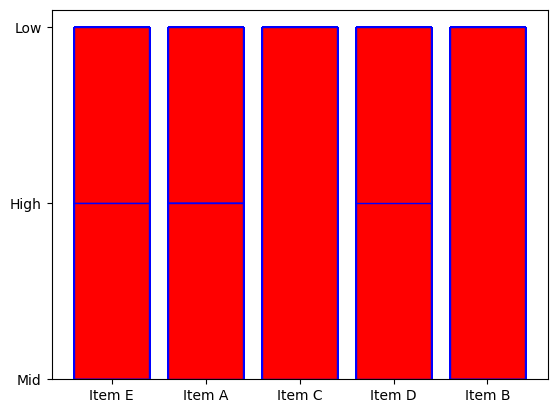

In [39]:
bars = plt.bar(df['ProductName'], df['PriceSegment'], color = 'red', edgecolor = 'blue')
plt.show()